In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [120]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1338, 7)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Basic Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.8

In [98]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")

Numeric columns: ['age', 'bmi', 'children', 'charges']
Categorical columns: ['sex', 'smoker', 'region']

sex: ['female' 'male']
Value counts:
sex
male      676
female    662
Name: count, dtype: int64

smoker: ['yes' 'no']
Value counts:
smoker
no     1064
yes     274
Name: count, dtype: int64

region: ['southwest' 'southeast' 'northwest' 'northeast']
Value counts:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


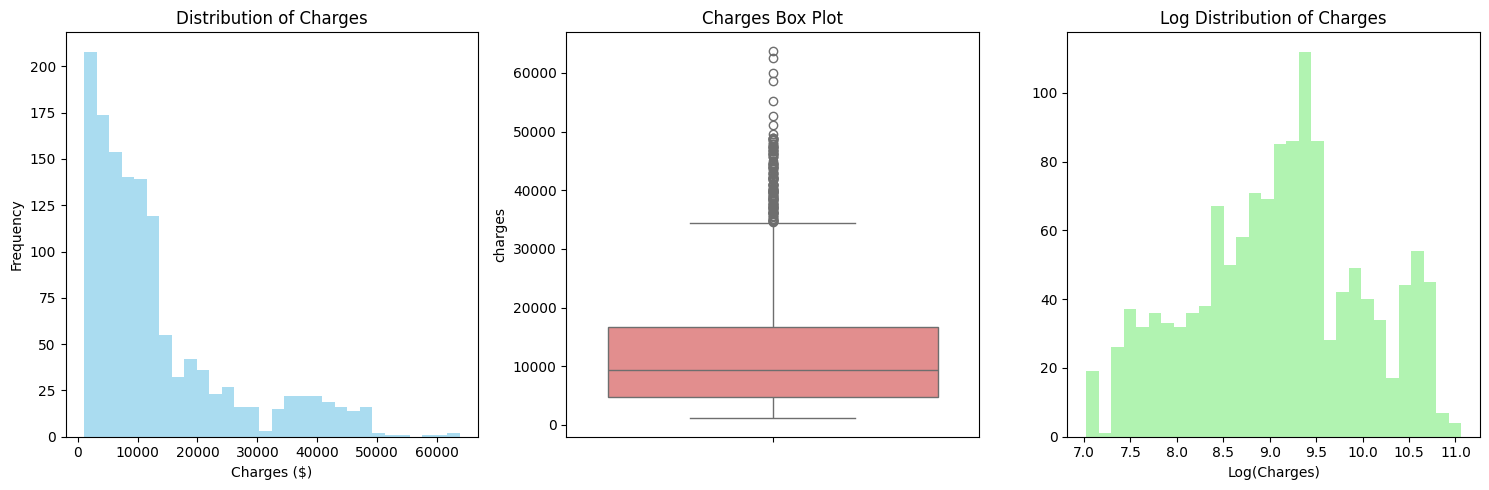

Charges Statistics:
Mean: $13270.42
Median: $9382.03
Std: $12110.01
Min: $1121.87
Max: $63770.43


In [124]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['charges'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['charges'], color='lightcoral')
plt.title('Charges Box Plot')

plt.subplot(1, 3, 3)
plt.hist(np.log(df['charges']), bins=30, alpha=0.7, color='lightgreen')
plt.title('Log Distribution of Charges')
plt.xlabel('Log(Charges)')

plt.tight_layout()
plt.show()

print("Charges Statistics:")
print(f"Mean: ${df['charges'].mean():.2f}")
print(f"Median: ${df['charges'].median():.2f}")
print(f"Std: ${df['charges'].std():.2f}")
print(f"Min: ${df['charges'].min():.2f}")
print(f"Max: ${df['charges'].max():.2f}")

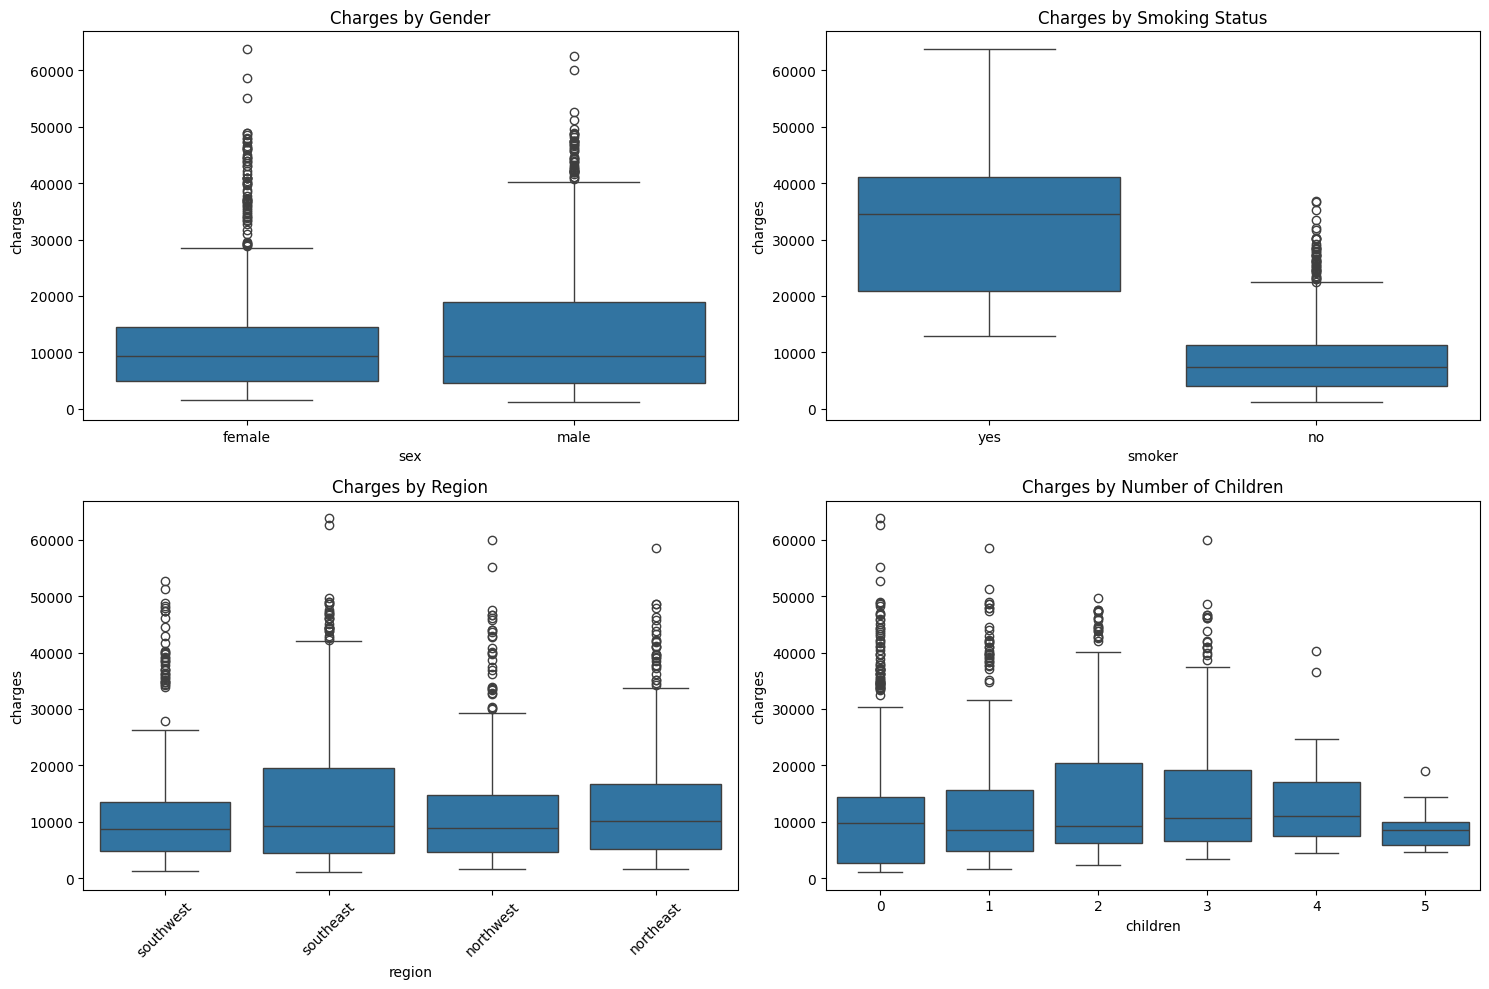

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sex vs Charges
sns.boxplot(data=df, x='sex', y='charges', ax=axes[0,0])
axes[0,0].set_title('Charges by Gender')

# Smoker vs Charges
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0,1])
axes[0,1].set_title('Charges by Smoking Status')

# Region vs Charges
sns.boxplot(data=df, x='region', y='charges', ax=axes[1,0])
axes[1,0].set_title('Charges by Region')
axes[1,0].tick_params(axis='x', rotation=45)

# Children vs Charges
sns.boxplot(data=df, x='children', y='charges', ax=axes[1,1])
axes[1,1].set_title('Charges by Number of Children')

plt.tight_layout()
plt.show()

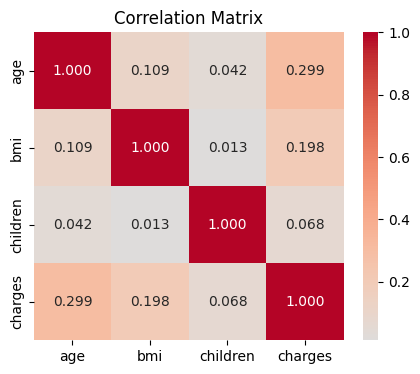

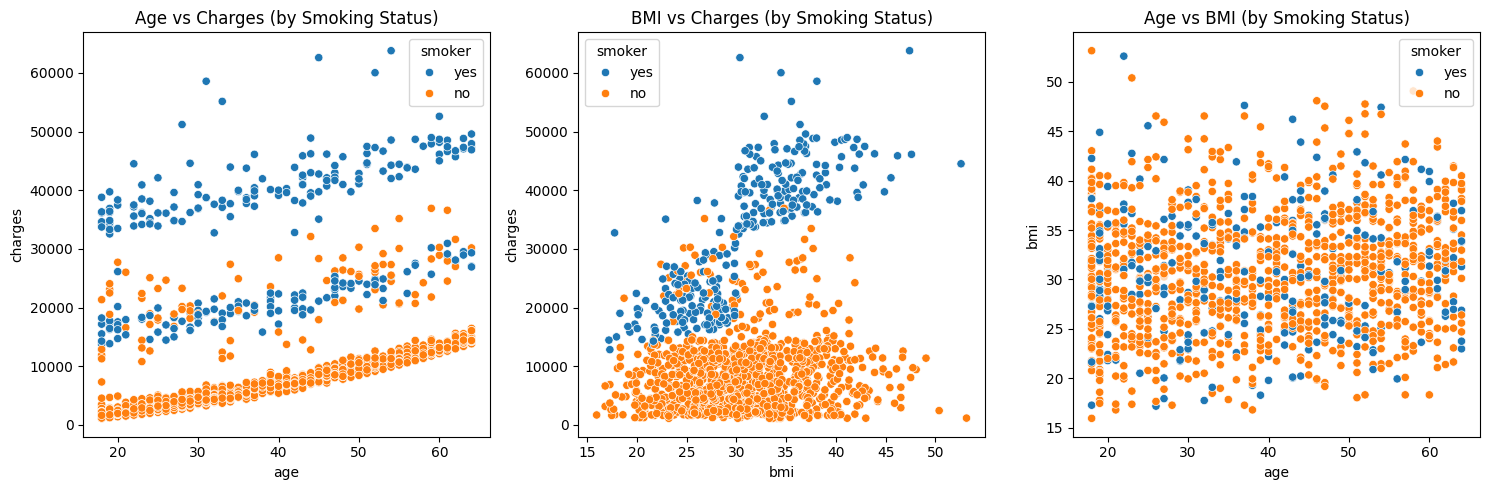

In [127]:
# Correlation matrix
plt.figure(figsize=(5, 4))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=axes[0])
axes[0].set_title('Age vs Charges (by Smoking Status)')

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=axes[1])
axes[1].set_title('BMI vs Charges (by Smoking Status)')

# Age vs BMI
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', ax=axes[2])
axes[2].set_title('Age vs BMI (by Smoking Status)')

plt.tight_layout()
plt.show()

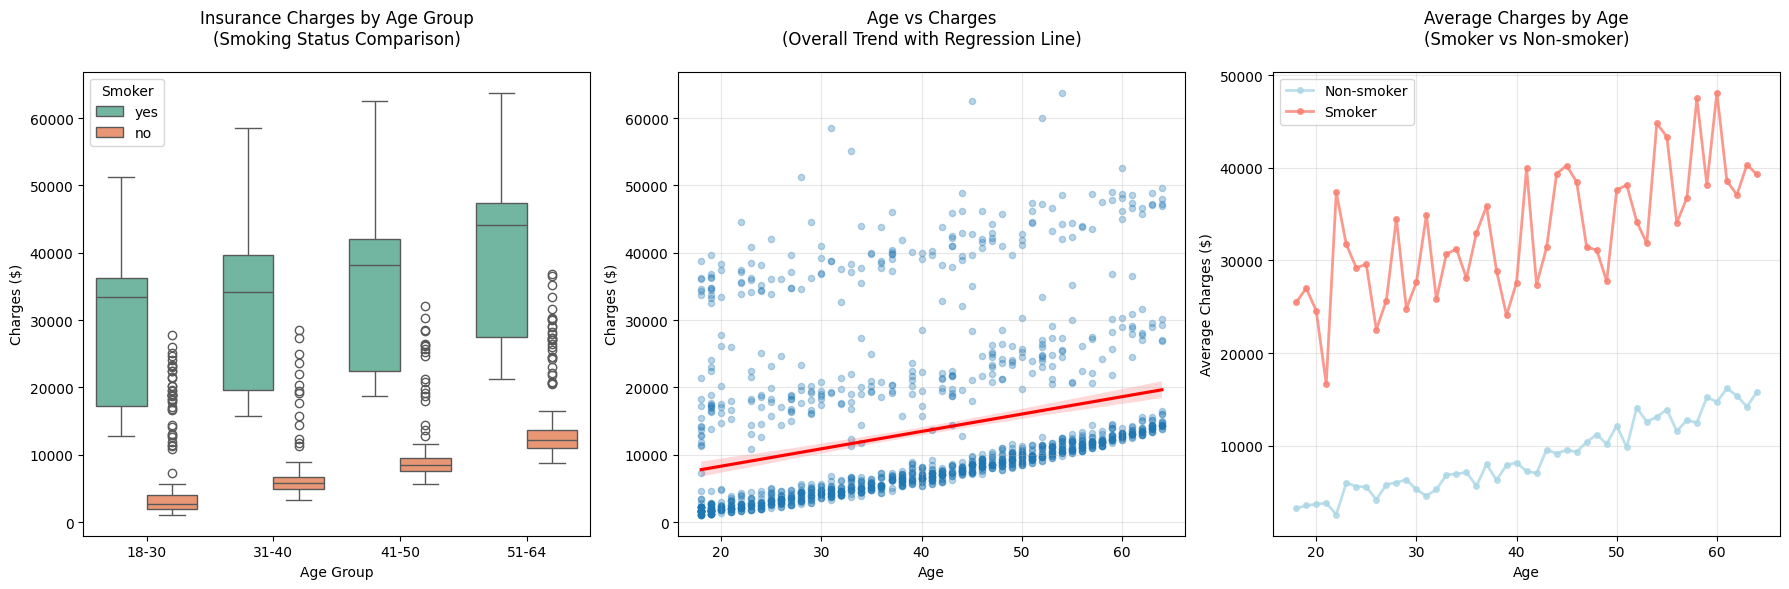

In [142]:
df['age_group'] = pd.cut(df['age'], 
                        bins=[17, 30, 40, 50, 65], 
                        labels=['18-30', '31-40', '41-50', '51-64'])

plt.figure(figsize=(18, 6))

# 1. Box Plot - Age Groups
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='age_group', y='charges', hue='smoker', 
            palette='Set2')
plt.title('Insurance Charges by Age Group\n(Smoking Status Comparison)', 
          fontsize=12, pad=20)
plt.xlabel('Age Group')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker')

# 2. Smooth Line - Overall Trend
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='age', y='charges', scatter_kws={'alpha':0.3, 's':20}, 
            line_kws={'color':'red'})
plt.title('Age vs Charges\n(Overall Trend with Regression Line)', 
          fontsize=12, pad=20)
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.grid(True, alpha=0.3)

# 3. Separated Lines for Smokers
plt.subplot(1, 3, 3)
for smoker_status in ['no', 'yes']:
    subset = df[df['smoker'] == smoker_status]
    age_avg = subset.groupby('age')['charges'].mean()
    
    label = 'Non-smoker' if smoker_status == 'no' else 'Smoker'
    color = 'lightblue' if smoker_status == 'no' else 'salmon'
    
    plt.plot(age_avg.index, age_avg.values, marker='o', 
             linewidth=2, label=label, color=color, alpha=0.8, markersize=4)

plt.title('Average Charges by Age\n(Smoker vs Non-smoker)', 
          fontsize=12, pad=20)
plt.xlabel('Age')
plt.ylabel('Average Charges ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

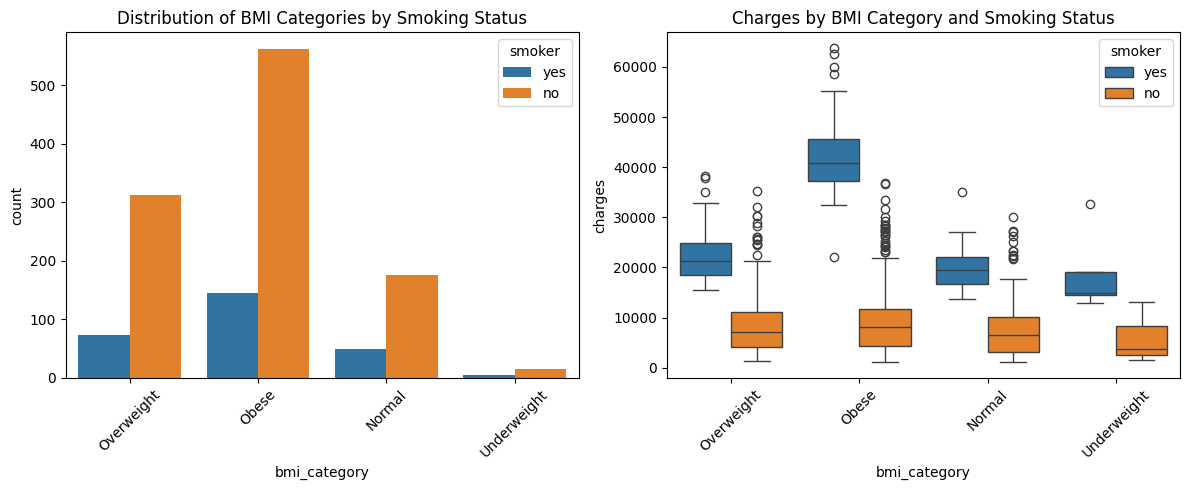

In [144]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='bmi_category', hue='smoker')
plt.title('Distribution of BMI Categories by Smoking Status')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='bmi_category', y='charges', hue='smoker')
plt.title('Charges by BMI Category and Smoking Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [104]:
print("=== SMOKING STATUS ANALYSIS ===")
smoking_stats = df.groupby('smoker')['charges'].agg(['mean', 'median', 'std', 'count'])
print(smoking_stats)

print("\n=== GENDER ANALYSIS ===")
gender_stats = df.groupby('sex')['charges'].agg(['mean', 'median', 'std', 'count'])
print(gender_stats)

print("\n=== REGION ANALYSIS ===")
region_stats = df.groupby('region')['charges'].agg(['mean', 'median', 'std', 'count'])
print(region_stats)

print("\n=== CHILDREN ANALYSIS ===")
children_stats = df.groupby('children')['charges'].agg(['mean', 'median', 'std', 'count']).T
print(children_stats)

=== SMOKING STATUS ANALYSIS ===
                mean       median           std  count
smoker                                                
no       8434.268298   7345.40530   5993.781819   1064
yes     32050.231832  34456.34845  11541.547176    274

=== GENDER ANALYSIS ===
                mean      median           std  count
sex                                                  
female  12569.578844  9412.96250  11128.703801    662
male    13956.751178  9369.61575  12971.025915    676

=== REGION ANALYSIS ===
                   mean        median           std  count
region                                                    
northeast  13406.384516  10057.652025  11255.803066    324
northwest  12417.575374   8965.795750  11072.276928    325
southeast  14735.411438   9294.131950  13971.098589    364
southwest  12346.937377   8798.593000  11557.179101    325

=== CHILDREN ANALYSIS ===
children             0             1             2             3  \
mean      12365.975602  12731.171

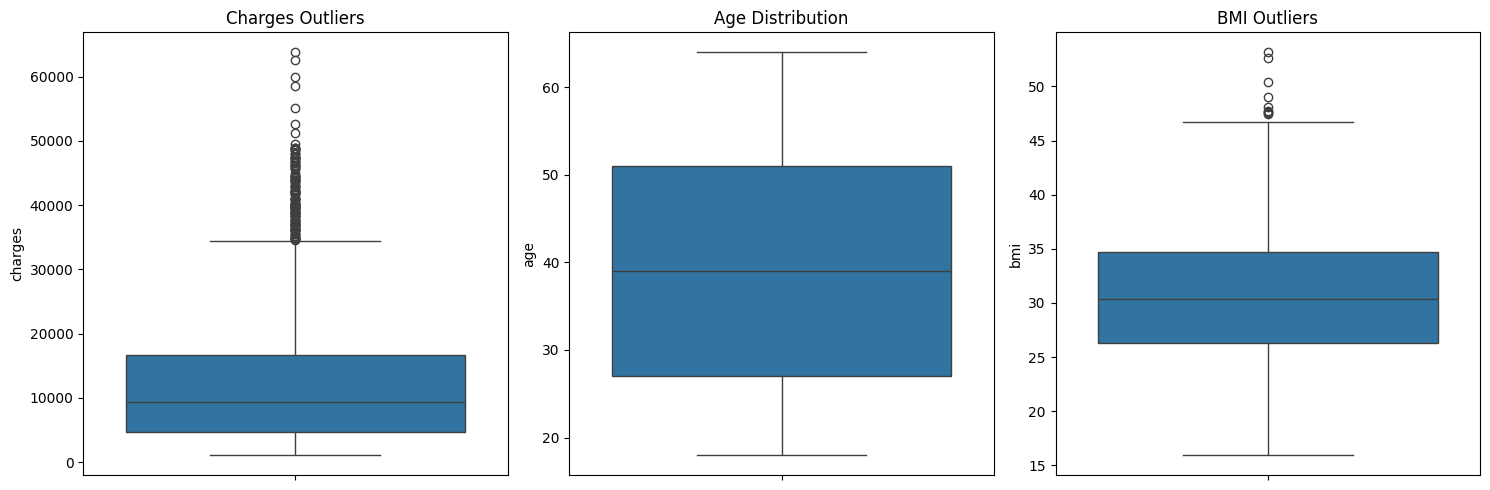

Number of outliers in charges: 139 (10.4%)


In [105]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['charges'])
plt.title('Charges Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['age'])
plt.title('Age Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['bmi'])
plt.title('BMI Outliers')

plt.tight_layout()
plt.show()

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(f"Number of outliers in charges: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

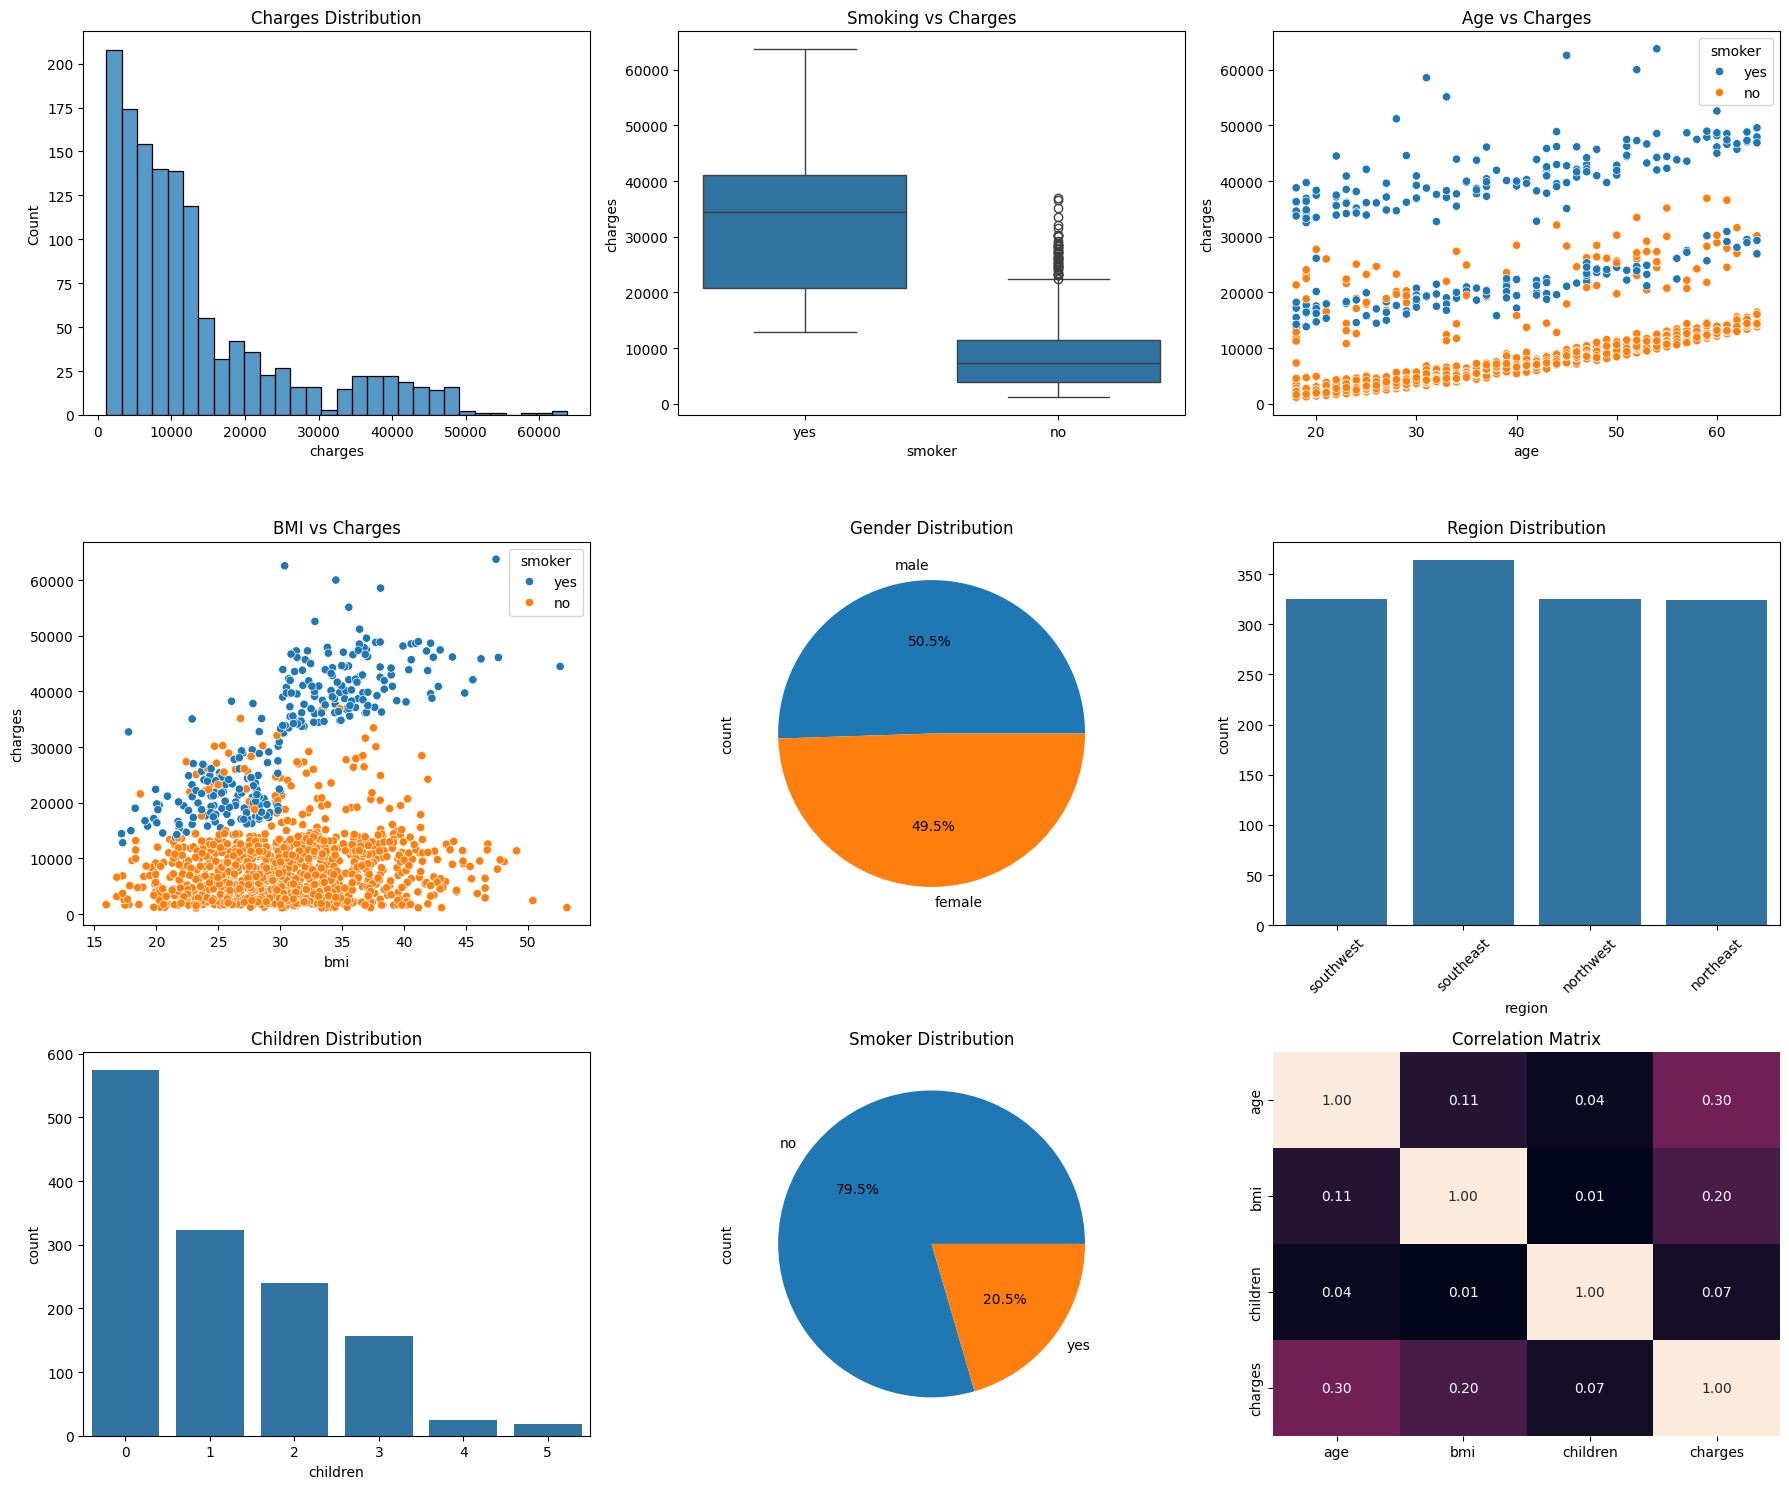

In [106]:
# Genel özet dashboard
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Charges distribution
sns.histplot(df['charges'], bins=30, ax=axes[0,0])
axes[0,0].set_title('Charges Distribution')

# 2. Smoking effect
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0,1])
axes[0,1].set_title('Smoking vs Charges')

# 3. Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=axes[0,2])
axes[0,2].set_title('Age vs Charges')

# 4. BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=axes[1,0])
axes[1,0].set_title('BMI vs Charges')

# 5. Gender distribution
df['sex'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Gender Distribution')

# 6. Region distribution
sns.countplot(data=df, x='region', ax=axes[1,2])
axes[1,2].set_title('Region Distribution')
axes[1,2].tick_params(axis='x', rotation=45)

# 7. Children distribution
sns.countplot(data=df, x='children', ax=axes[2,0])
axes[2,0].set_title('Children Distribution')

# 8. Smoker distribution
df['smoker'].value_counts().plot(kind='pie', ax=axes[2,1], autopct='%1.1f%%')
axes[2,1].set_title('Smoker Distribution')

# 9. Correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', ax=axes[2,2], cbar=False)
axes[2,2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [107]:
df['sex'] = df['sex'].replace({'female': 1, 'male': 2})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 2})
df['region'] = df['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
df.head()

C:\Users\BARIŞ KÖSE\AppData\Local\Temp\ipykernel_22828\2677805313.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'female': 1, 'male': 2})
C:\Users\BARIŞ KÖSE\AppData\Local\Temp\ipykernel_22828\2677805313.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 2})
C:\Users\BARIŞ KÖSE\AppData\Local\Temp\ipykernel_22828\2677805313.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,1,27.900,0,1,1,16884.92400,18-30,Overweight
1,18,2,33.770,1,2,2,1725.55230,18-30,Obese
2,28,2,33.000,3,2,2,4449.46200,18-30,Obese
3,33,2,22.705,0,2,3,21984.47061,31-40,Normal
4,32,2,28.880,0,2,3,3866.85520,31-40,Overweight


In [108]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_category'],
      dtype='object')

In [109]:
X = df[[
    'age', 'sex', 'bmi', 'children', 'smoker', 'region',
]]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

lin = LinearRegression()

poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [110]:
y_pred = lin.predict(X_test_poly)

In [111]:
mean_absolute_error(y_test, y_pred)

12689.074091573993

In [112]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

1973.1367834933671

In [113]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin = LinearRegression()
lin.fit(X_poly_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

2818.83101081972

In [115]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

2818.1484848384484

In [117]:
sns.scatterplot(x=X, y=y_pred)

ValueError: Data must be 1-dimensional, got ndarray of shape (1338, 6) instead